In [1]:
# Practica II Lab. Diseño Geometrico
# Dataset: "Suicide rates"

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['Country', 'Year', 'Sex', 'Age', 'Suicides_no', 'Population', 'Suicides/100k pop', 'Country-year', 'HDI for year','Gdp_for_year ($)','Gdp_per_capita ($)','Generation']
# load dataset
rate = pd.read_csv("master.csv", header=None, names=col_names)

rate.head()

Country  Year     Sex          Age  Suicides_no  Population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   Suicides/100k pop Country-year  HDI for year Gdp_for_year ($)  \
0               6.71  Albania1987           NaN    2,156,624,900   
1               5.19  Albania1987           NaN    2,156,624,900   
2               4.83  Albania1987           NaN    2,156,624,900   
3               4.59  Albania1987           NaN    2,156,624,900   
4               3.28  Albania1987           NaN    2,156,624,900   

   Gdp_per_capita ($)       Generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [2]:
#split dataset in features and target variable
feature_cols = ['Suicides_no','Population','Gdp_per_capita ($)','Suicides/100k pop']
X = rate[feature_cols] # Features
y = rate.Sex # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1) # 40% training and 60% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['male','female'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('suicide_rate_1.png')
Image(graph.create_png())


Accuracy: 0.6934459621375509
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.265343 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.265343 to fit



In [3]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7162712676731369


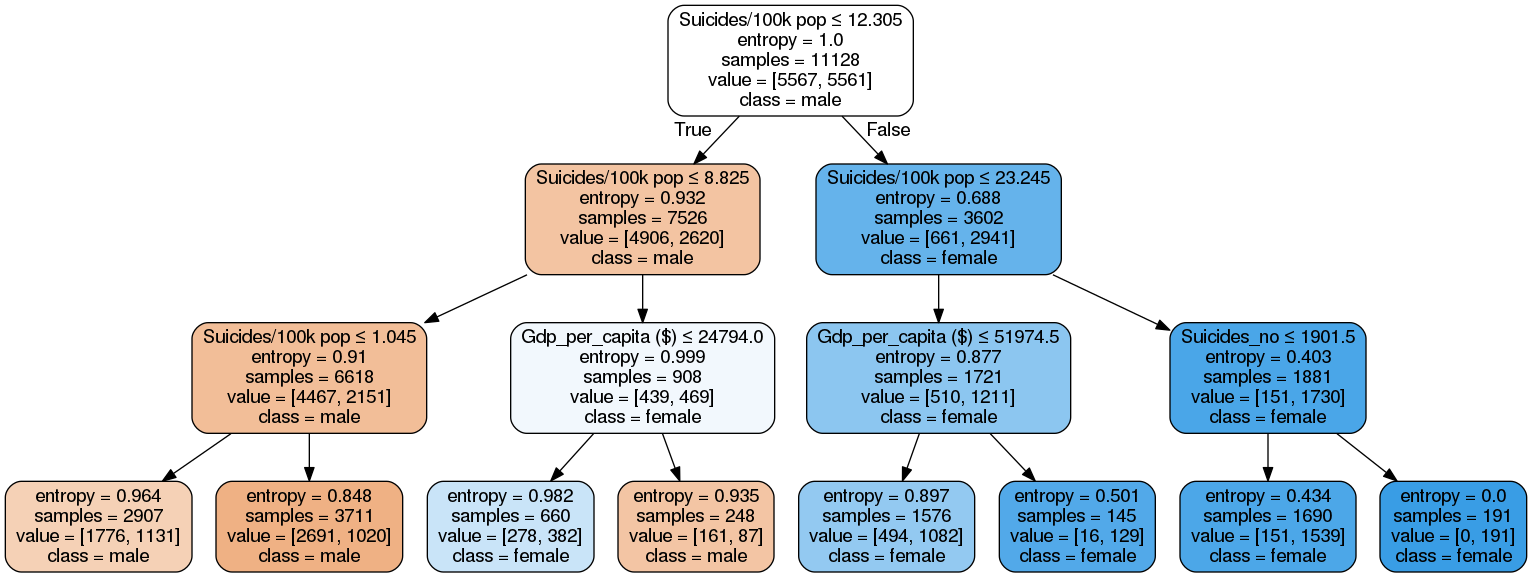

In [4]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['male','female'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('suicide_rate_2.png')
Image(graph.create_png())